## 영상정보처리 9주차 과제 템플리트
- 점수: 10점 만점
-- 일부만 찾은 경우 5점, 다 찾으면 10점
- 이미지 경로 잘못 사용한 경우: -3
- 소스 이미지: 
1. messi5.jpg - 샘플 검출 대상 이미지
2. messi5_shirt_blue.png - 셔츠의 파란 부분
3. messi5_shirt_red.png  - 셔츠의 붉은 부분
    

이름: 조민서            
학번: 32174224


# 구글 드라이브 마우팅 및 작업 경로로 이동
- 다음 쉘에 필요한 작업을 하시오. 

In [1]:
from google.colab import drive 
drive.mount('/gdrive')
%cd /gdrive/MyDrive/ImageProcClass/Notebook-Week09/

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/ImageProcClass/Notebook-Week09


다음의 경로는 변경하지 말것. 만일 해당 이미지가 없는 경우, 같이 업로드한 이미지를 해당 폴더에 저장해서 사용할 것. 

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src_image_path = '../Dongkeun-OpenCV-ImgData/messi5.jpg'
red_roi_image_path = '../Dongkeun-OpenCV-ImgData/messi5_shirt_red.png'
blue_roi_image_path = '../Dongkeun-OpenCV-ImgData/messi5_shirt_blue.png'

def show_with_matplotlib(img, title):
    """Shows an image using matplotlib capabilities"""
    if img is None:
      print("show_with_matplotlib: Could not read the image.")
      return

    if img.shape[2] != 3:
      print()
      print("show_with_matplotlib: given image does not contains 3 channels")
      return

    # Convert BGR image to RGB:
    img_RGB = img[:, :, ::-1]

    # Show the image using matplotlib:
    plt.imshow(img_RGB)
    plt.title(title)
    plt.show()


##문제 1:

위에서 언급한 src_image_path 의 이미지 부분 중에서 셔츠 부분을 검출하는 것이 최종 목표이며, 결과 이미지에는 해당 영역의 3-채널 영상 부분이 담겨 있어야 한다. 
방법은 수업 동영상에 설명한 histgram backprojection 을 사용하며, 구체적 단계는 강의 동영상을 참조한다. red_roi_image_path 와 blue_roi_image_path 를 검출 대상에 히스토그램 작성에 사용한다. 






In [3]:
#이미지 읽어오기
red_roi = cv2.imread(red_roi_image_path)
blue_roi = cv2.imread(blue_roi_image_path)
target = cv2.imread(src_image_path)

#이미지들 채널 변경
red_hsv = cv2.cvtColor(red_roi,cv2.COLOR_BGR2HSV)
blue_hsv = cv2.cvtColor(blue_roi,cv2.COLOR_BGR2HSV)
target_hsv = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)

In [4]:
#상의 부분문 mask생성
# mask = target_hsv[100:250,150:330]

#histogram만들기
red_roihist = cv2.calcHist([red_hsv],[0,1],None,[180,256],[0,180,0,255])
blue_roihist = cv2.calcHist([blue_hsv],[0,1],None,[180,256],[0,180,0,255])

#정규화와 backproject하기 
cv2.normalize(red_roihist,red_roihist,0,255,cv2.NORM_MINMAX)
cv2.normalize(blue_roihist,blue_roihist,0,255,cv2.NORM_MINMAX)

dst_red = cv2.calcBackProject([target_hsv],[0,1],red_roihist,[0,180,0,255],1)
dst_blue = cv2.calcBackProject([target_hsv],[0,1],blue_roihist,[0,180,0,255],1)

#상의 부분만 정규화 backproject할때
# dst_red = cv2.calcBackProject([mask],[0,1],red_roihist,[0,180,0,255],2)
# dst_blue = cv2.calcBackProject([mask],[0,1],blue_roihist,[0,180,0,255],1)

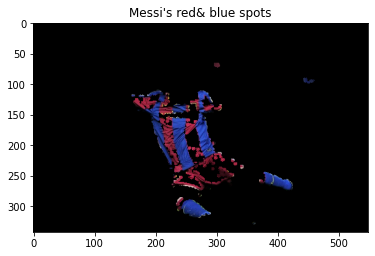

In [5]:
#원하는 근처값들 뭉치기
disc_red= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(6,6))
cv2.filter2D(dst_red,-1,disc_red,dst_red)
disc_blue= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
cv2.filter2D(dst_blue,-1,disc_blue,dst_blue)

#빨강 부분과 파란 부분 합치기
dst = cv2.add(dst_red,dst_blue)

#배경 이미지 -> 상의만 부분 추출할경우
# back_g = np.zeros(target.shape,dtype ="uint8")

#이미지들 추출한거 원래 색 입히기
thresh = cv2.threshold(dst,50,255,0)[1]
thresh_3ch = cv2.merge((thresh,thresh,thresh))

result_temp = cv2.bitwise_and(target,thresh_3ch)

#원본 이미지와 위치같게 만들기 -> 상의 부분만 할때
# back_g[100:250,150:330] =thresh_3ch
# result_temp = cv2.bitwise_and(target,back_g)

show_with_matplotlib(result_temp,"Messi's red& blue spots")